#### In Depth: Naive Bayes Classification


# **Naïve Bayes Classification **

What is Naive Bayes algorithm?

Naive Bayes is a classification technique based on Bayes’ Theorem(Probability theory) with an assumption that all the features that predicts the target value are independent of each other. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature in determining the target value.

Why should we use Naive Bayes ?

As stated above, It is easy to build and is particularly useful for very large data sets.
It is extremely fast for both training and prediction.
It provide straightforward probabilistic prediction.
It is often very easily interpretable.
It has very few (if any) tunable parameters.
It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).



The Naïve Bayes classifier is based on Bayes' Theorem:

$$
P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}
$$

Since Naïve Bayes assumes that features are independent, the likelihood can be written as:

$$
P(X | C_k) = \prod_{i=1}^{n} P(x_i | C_k)
$$

---

## **Explanation:**
- **\( P(C_k | X) \)** → Posterior probability of class \( C_k \) given features \( X \).  
- **\( P(X | C_k) \)** → Likelihood of features \( X \) given class \( C_k \).  
- **\( P(C_k) \)** → Prior probability of class \( C_k \).  
- **\( P(X) \)** → Evidence or total probability of \( X \).  
- **Naïve Bayes Assumption:** Features \( X = (x_1, x_2, ..., x_n) \) are **conditionally independent**, allowing the likelihood to be written as a product of individual feature probabilities.  

This is useful for classification tasks in **text processing, spam detection, sentiment analysis**, and more.






 
$$
P(A∣B)= \frac{P(B∣A)P(A)}{P(B)}
$$



𝑃
(
𝐴
∣
𝐵
)
P(A∣B) → Probabilidade de 
𝐴
A ocorrer dado que 
𝐵
B aconteceu (probabilidade posterior).

𝑃
(
𝐵
∣
𝐴
)
P(B∣A) → Probabilidade de 
𝐵
B ocorrer dado que 
𝐴
A aconteceu (verossimilhança).

𝑃
(
𝐴
)
P(A) → Probabilidade inicial de 
𝐴
A ocorrer (probabilidade a priori).

𝑃
(
𝐵
)
P(B) → Probabilidade de 
𝐵
B ocorrer (evidência).



$$
https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python
$$
$$
https://joaoclaudionc.medium.com/o-algoritmo-naive-bayes-descri%C3%A7%C3%A3o-e-implementa%C3%A7%C3%A3o-em-python-35757ade6b36
$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


 Gaussian Naive Bayes
In this classifier, the assumption is that data from each label is drawn from a simple Gaus
sian distribution. 

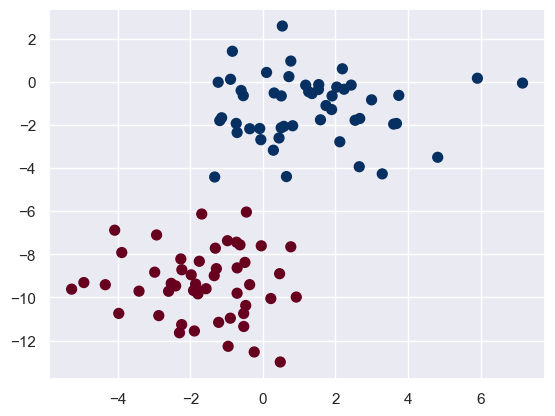

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100,2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(np.float64(-5.890554373486014),
 np.float64(7.777566725032841),
 np.float64(-13.775943665162341),
 np.float64(3.3634536696825847))

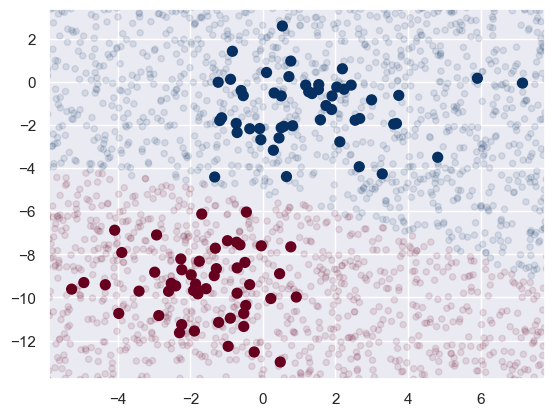

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [9]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

 Multinomial Naive Bayes


 Example: Classifying text


In [10]:
from sklearn.datasets import fetch_20newsgroups

In [13]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [14]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [16]:
 print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [18]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [19]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(110.44999999999996, 0.5, 'predict label')

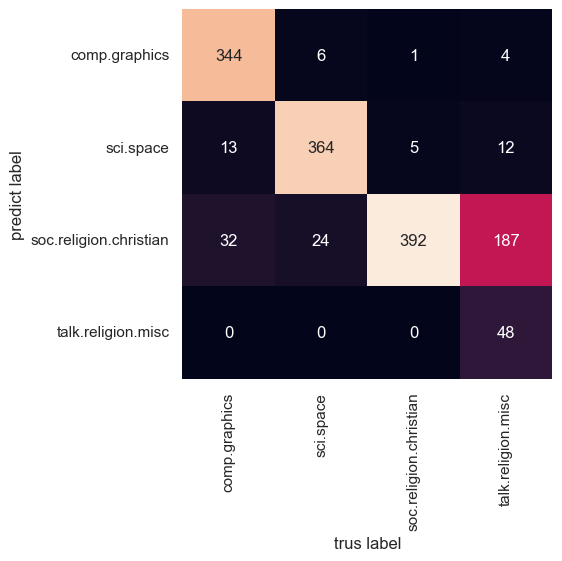

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('trus label')
plt.ylabel('predict label')

In [22]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [23]:
predict_category('sending men to mars')

'sci.space'

In [24]:
predict_category('write newspaper')

'comp.graphics'

 ## When to Use Naive Bayes
 ### • When the naive assumptions actually match the data (very rare in practice)
 ### • For very well-separated categories, when model complexity is less important
 ### • For very high-dimensional data, when model complexity is less important

# 📩 Spam Classification: Naive Bayes vs. Logistic Regression vs. Others

## **1️⃣ Naive Bayes (Multinomial or Bernoulli)**
✔️ **Pros:**  
- ✅ Fast and computationally efficient (even for large datasets).  
- ✅ Works well with **text classification** (word frequencies, bag-of-words, TF-IDF).  
- ✅ Handles noisy data and performs decently with small datasets.  

❌ **Cons:**  
- ❌ Assumes **feature independence**, which is often unrealistic.  
- ❌ Struggles when features are **highly correlated** (e.g., word dependencies in text).  

**🔹 Best when?**  
- ✔️ When you need **fast, interpretable results** with limited data.  
- ✔️ If using **bag-of-words or TF-IDF** for text representation.  

---

## **2️⃣ Logistic Regression**
✔️ **Pros:**  
- ✅ Performs better than Naive Bayes when features have dependencies.  
- ✅ Can output **probabilities** for spam likelihood.  
- ✅ Works well with **TF-IDF** and embeddings.  

❌ **Cons:**  
- ❌ Can be **slow** for very large datasets.  
- ❌ Requires proper **feature scaling**.  

**🔹 Best when?**  
- ✔️ If you have a **large dataset** with more advanced text preprocessing.  
- ✔️ If interpretability and **probability scores** are important.  

---

## **3️⃣ Other Models (More Advanced)**
### **📌 Support Vector Machines (SVM)**
- ✅ Works well for **high-dimensional text data**.  
- ✅ Performs well with TF-IDF and word embeddings.  
- ❌ **Slow training** on large datasets.  
- **Best when?** You need **high accuracy** and can afford more training time.  

### **📌 Deep Learning (LSTMs, Transformers, BERT)**
- ✅ Can **capture word order and context**.  
- ✅ **Best accuracy** when using pre-trained models (e.g., BERT, GPT).  
- ❌ Needs **lots of data and computing power**.  
- **Best when?** If you have a **huge dataset** and want **state-of-the-art performance**.  

---

## **📊 Conclusion: Which One is Best?**
| Model               | Pros | Cons | Best For |
|--------------------|------|------|---------|
| **Naive Bayes** | Fast, good for small data | Assumes feature independence | Small datasets, quick results |
| **Logistic Regression** | More robust, works with correlated features | Slower, requires feature scaling | Medium to large datasets |
| **SVM** | High accuracy | Slow for big data | High-dimensional text data |
| **Deep Learning (BERT, LSTM)** | Captures word order & context | Needs lots of data & computing power | Large datasets, best accuracy |

📌 **If starting, use Naive Bayes as a baseline, but Logistic Regression or SVM usually perform better with good feature engineering.** 🚀
